In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#sigmoid function
def sigmoid(X):
   return 1/(1+np.exp(-X))
#ReLu function
def relu(X):
   return np.maximum(0,X)

# Question 1 

In [20]:
input = [(1,1),(1,-1),(-1,-1)]

In [26]:
W = [[1]*2]*10
o_W = [1]*10
b = [1]*10
o_b = 1

In [30]:
Y = []
ind = 0
for x in X:
    outs = []
    for i in range(len(W)):
        input = np.dot(x,W[i])+b[i]
        out = relu(input)
#         print("o"+str(i)+" = ", out)
        outs.append(out)
    print("o1-10: ", outs)
    input = np.dot(outs, o_W)+o_b
    y = sigmoid(input)
#     print(y)
    print("y" +str(++ind)+"= ", y)
    Y.append(y)
    

o1-10:  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
y0=  0.9999999999999656
o1-10:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y0=  0.999983298578152
o1-10:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y0=  0.7310585786300049


In [33]:
Y

[0.9999999999999656, 0.999983298578152, 0.7310585786300049]

## 1.2

In [101]:
# np.random.normal(loc=0.0, scale=1.0, size=1)
W= []
b = []
for i in range(10):
    W.append(tuple(np.random.normal(loc=0.0, scale=1.0, size=2)))
    b.append(np.random.normal(loc=0.0, scale=1.0, size=1)[0])
o_W = tuple(np.random.normal(loc=0.0, scale=1.0, size=10))
o_b = np.random.normal(loc=0.0, scale=1.0, size=1)[0]

In [102]:
Y = []
X = []
ind = 0
for i in np.arange(-5,5,0.5):
    for j in np.arange(-5,5,0.5):
        X.append((i,j))
ind = 0
for x in X:
    outs = []
    for i in range(len(W)):
        input = np.dot(x,W[i])+b[i]
        out = relu(input)
        outs.append(out)
    input = np.dot(outs, o_W)+o_b
    y = sigmoid(input)
    ind += 1
    Y.append(y)
    

In [103]:
X1 = [x[0] for x in X]
X2 = [x[1] for x in X]
# Y1 = np.array(Y)
o_W

(-0.36179340596945503,
 0.18601622518233313,
 -0.39067119491731106,
 -0.09151529832872594,
 -0.5164916239175833,
 0.6475533597622611,
 -1.0878951845341294,
 1.652944835479818,
 0.3933194290400691,
 1.3552848710221286)

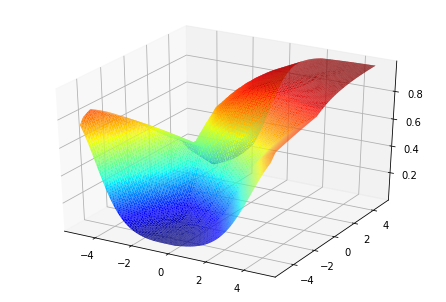

In [104]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(X1, X2, Y, cmap = cm.jet, linewidth=0.1)

In [106]:
np.random.randn(4,2)

array([[ 1.53319273,  0.12141474],
       [-1.38182532,  0.78306107],
       [ 1.6661258 , -1.39667976],
       [-0.60133159,  1.14902024]])

In [107]:
nn_architecture = [
    {"input_dim": 2, "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": 6, "activation": "relu"},
    {"input_dim": 6, "output_dim": 6, "activation": "relu"},
    {"input_dim": 6, "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": 1, "activation": "sigmoid"},
]

In [143]:
def init_layers(nn_architecture, init_params = None, seed = 99):
#     np.random.seed(seed)
    number_of_layers = len(nn_architecture)
    params_values = {}

    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        if init_params == None:
            params_values['W' + str(layer_idx)] = np.random.randn(
                layer_output_size, layer_input_size) * 0.1
            params_values['b' + str(layer_idx)] = np.random.randn(
                layer_output_size, 1) * 0.1
    if init_params != None:
        params_values = init_params
    return params_values

In [90]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ;

In [96]:
def single_forward(in_prev, W_curr, b_curr, activation="relu"):
    out_curr = np.dot(W_curr, in_prev) + b_curr
    
    if activation is "relu":
        return relu(out_curr), out_curr
    elif activation is "sigmoid":
        return sigmoid(out_curr), out_curr

In [97]:
def forward(X, params_values, nn_architecture):
    memory = {}
    in_curr = X
    
    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        in_prev = in_curr
        
        activ_function_curr = layer["activation"]
        W_curr = params_values["W" + str(layer_idx)]
        b_curr = params_values["b" + str(layer_idx)]
        in_curr, out_curr = single_forward(in_prev, W_curr, b_curr, activ_function_curr)
        
        memory["in" + str(idx)] = in_prev
        memory["out" + str(layer_idx)] = out_curr
       
    return in_curr, memory

# Question1

In [101]:
nn_archi = [
    {"input_dim": 2, "output_dim": 10, "activation": "relu"},
    {"input_dim": 10, "output_dim": 1, "activation": "sigmoid"},
]

## 1.1

In [102]:
params = {"W1":np.ones((10,2)),"b1":np.ones(10),"W2":np.ones(10),"b2":np.ones(1)}
p = init_layers(nn_archi,init_params = params)

In [103]:
X = [(1,1),(1,-1),(-1,-1)]
for x in X:
    result,mem = forward(x,p,nn_archi)
    print('y: %f' % result)
    print("o1-o10: ",mem['out1'])
    print("-------------------------------")

y: 1.000000
o1-o10:  [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
-------------------------------
y: 0.999983
o1-o10:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------
y: 0.731059
o1-o10:  [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
-------------------------------


## 1.2

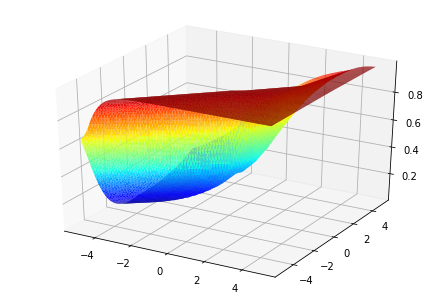

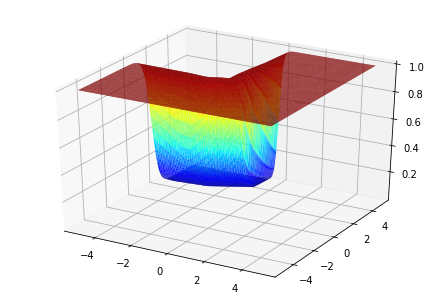

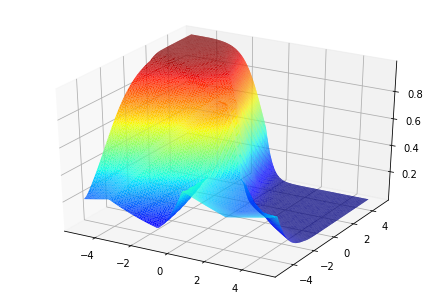

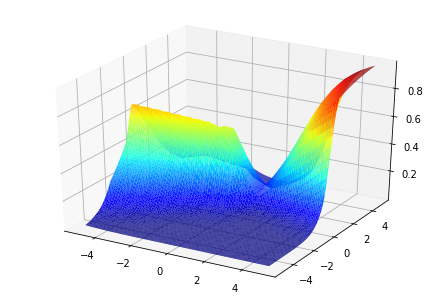

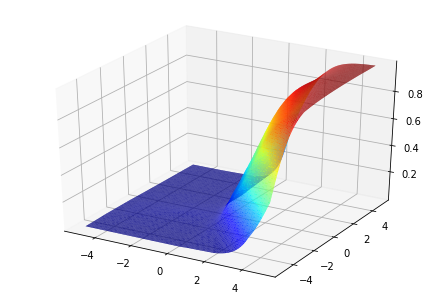

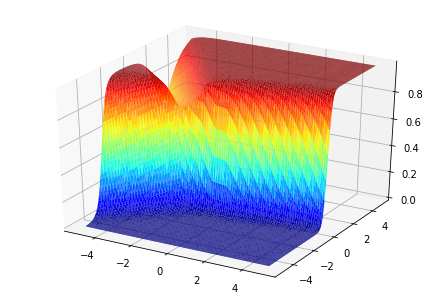

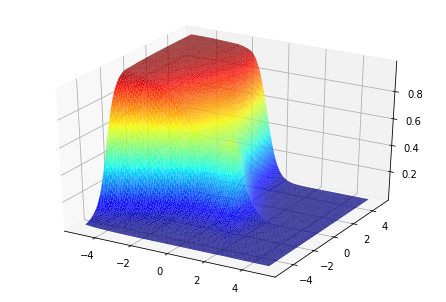

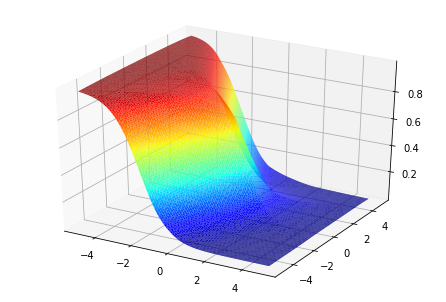

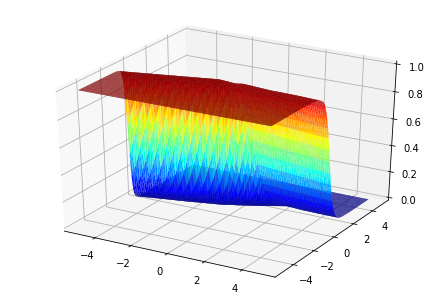

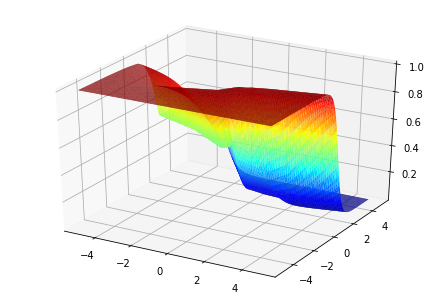

In [146]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
for hahaha in range(10):
#     np.random.seed = 123*hahaha
    params = {"W1":np.random.normal(0, 1, (10,2)),
              "b1":np.random.normal(0, 1, 10),
              "W2":np.random.normal(0, 1, 10),
              "b2":np.random.normal(0, 1, 1)}
#     print(params)
    p = init_layers(nn_archi,init_params = params)
    X = []
    Y = []
    for i in np.arange(-5,5.1,0.1):
        for j in np.arange(-5,5.1,0.1):
            X.append((i,j))
    for x in X:
        y,mem = forward(x,p,nn_archi)
        Y.append(y[0])

    fig = plt.figure()
    ax = Axes3D(fig)
    X1 = [x[0] for x in X]
    X2 = [x[1] for x in X]
    surf = ax.plot_trisurf(np.array(X1), np.array(X2), np.array(Y), cmap = cm.jet, linewidth=0.1)
    fig.savefig(str(hahaha))

## 1.3

In [148]:
nn_archi = [
    {"input_dim": 2, "output_dim": 2, "activation": "relu"},
    {"input_dim": 2, "output_dim": 2, "activation": "relu"},
    {"input_dim": 2, "output_dim": 2, "activation": "relu"},
    {"input_dim": 2, "output_dim": 2, "activation": "relu"},
    {"input_dim": 2, "output_dim": 2, "activation": "relu"},
    {"input_dim": 2, "output_dim": 1, "activation": "sigmoid"},
]

In [150]:
params = {}
for i in range(len(nn_archi)-1):
    params['W'+str(i+1)] = np.ones((2,2))
    params['b'+str(i+1)] = np.ones(2)
params['W'+str(len(nn_archi))] = np.ones((1,2))
params['b'+str(len(nn_archi))] = np.ones(1)
# params

In [152]:
p = init_layers(nn_archi,init_params = params)

In [155]:
X = [(1,1),(1,-1),(-1,-1)]
for x in X:
    result,mem = forward(x,p,nn_archi)
    print('y: %f' % result)
    for i in range(6):
        print(mem['out'+str(i+1)])
    print("-------------------------------")

y: 1.000000
[3. 3.]
[7. 7.]
[15. 15.]
[31. 31.]
[63. 63.]
[127.]
-------------------------------
y: 1.000000
[1. 1.]
[3. 3.]
[7. 7.]
[15. 15.]
[31. 31.]
[63.]
-------------------------------
y: 1.000000
[-1. -1.]
[1. 1.]
[3. 3.]
[7. 7.]
[15. 15.]
[31.]
-------------------------------


## 1.4

[0.2904202401471591]
[0.2904202401471591, 0.2904202401471591]
[0.2904202401471591, 0.2904202401471591, 0.2904202401471591]
[0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591]
[0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591]
[0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591]
[0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591]
[0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591]
[0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591]
[0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.2904202401471591, 0.29042024

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[0.00024920384959671636, 0.0005140063146717201, 0.0010598879339798843, 0.002184236248428185, 0.0044959454818539035, 0.009179648681590998, 0.016965381651689, 0.03114701160683075, 0.05650191952022906, 0.10035874540794534, 0.17204966355086232, 0.27906683421644807, 0.41896581288687584, 0.49036803660996303, 0.49036803660996303, 0.4902305501309547, 0.48999111694645964, 0.4897516883540506, 0.4895122644634864, 0.4892728453845174, 0.4890334312268848, 0.0003068384762763284, 0.000632844371783691, 0.0013047688496065054, 0.0026881922103641105, 0.0055303123532754, 0.010956661137622446, 0.020218814287209497, 0.03701762945272803, 0.06682185190750312, 0.11768982436014751, 0.19902229658673837, 0.3164052619106428, 0.4630011224423274, 0.49036803660996303, 0.49036803660996303, 0.4901408847001981, 0.48990145322252915, 0.4896620263780507, 0.48942260427651824, 0.4891831870276787, 0.48894377474127027, 0.00037779751562486976, 0.0007791363227809012, 0.0016061371013425367, 0.003308037479166589, 0.006801026717586

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[3.4130152879093854e-18]
[3.4130152879093854e-18, 1.8962136993043552e-16]
[3.4130152879093854e-18, 1.8962136993043552e-16, 1.0535043327133744e-14]
[3.4130152879093854e-18, 1.8962136993043552e-16, 1.0535043327133744e-14, 5.853092293618495e-13]
[3.4130152879093854e-18, 1.8962136993043552e-16, 1.0535043327133744e-14, 5.853092293618495e-13, 3.251879307255124e-11]
[3.4130152879093854e-18, 1.8962136993043552e-16, 1.0535043327133744e-14, 5.853092293618495e-13, 3.251879307255124e-11, 1.8066892644183516e-09]
[3.4130152879093854e-18, 1.8962136993043552e-16, 1.0535043327133744e-14, 5.853092293618495e-13, 3.251879307255124e-11, 1.8066892644183516e-09, 1.0037659684750968e-07]
[3.4130152879093854e-18, 1.8962136993043552e-16, 1.0535043327133744e-14, 5.853092293618495e-13, 3.251879307255124e-11, 1.8066892644183516e-09, 1.0037659684750968e-07, 5.57672379502058e-06]
[3.4130152879093854e-18, 1.8962136993043552e-16, 1.0535043327133744e-14, 5.853092293618495e-13, 3.251879307255124e-11, 1.8066892644183516e-

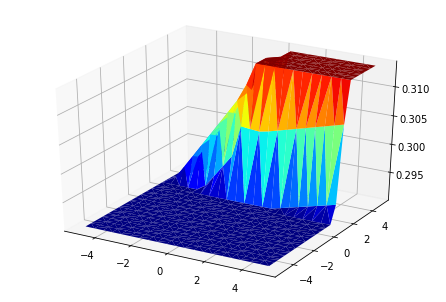

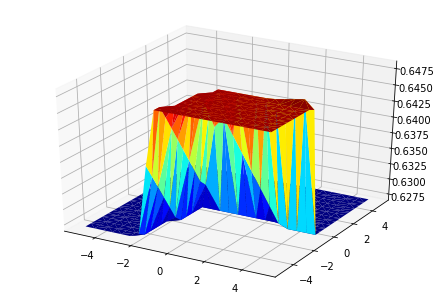

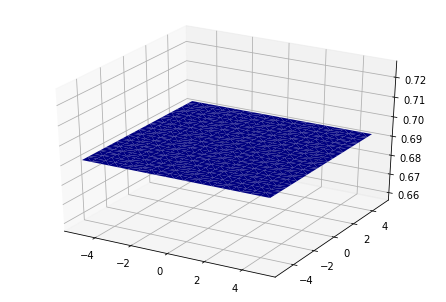

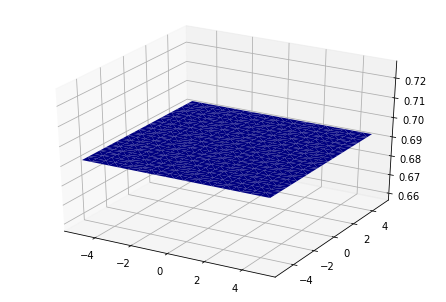

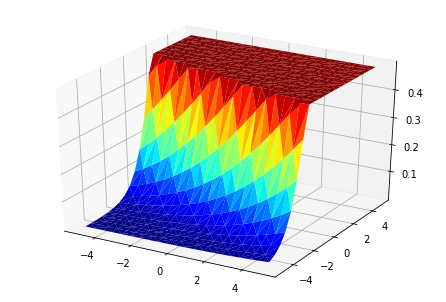

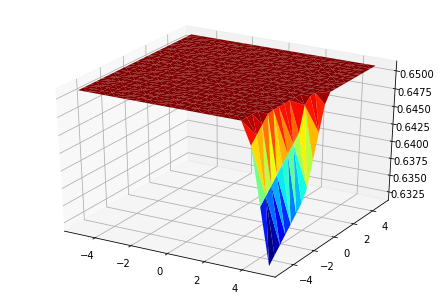

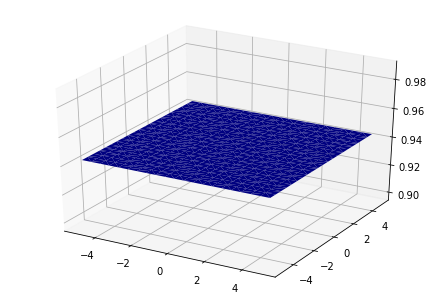

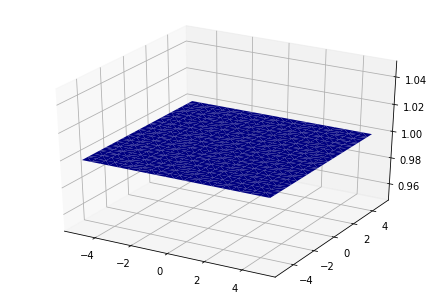

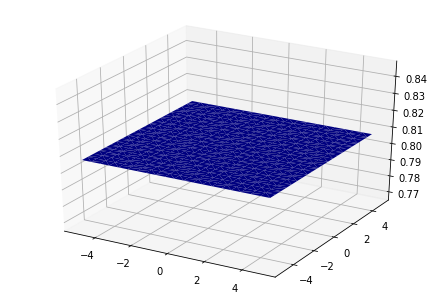

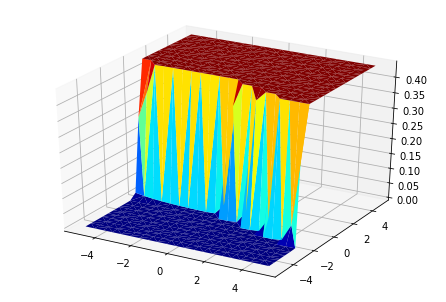

In [169]:
for hahaha in range(10):
#     np.random.seed = 123*hahaha
    params = {}
    for i in range(len(nn_archi)-1):
        params['W'+str(i+1)] = np.random.normal(0,1,(2,2))
        params['b'+str(i+1)] = np.random.normal(0,1,2)
    params['W'+str(len(nn_archi))] = np.random.normal(0,1,(1,2))
    params['b'+str(len(nn_archi))] = np.random.normal(0,1,1)
#     print(params)
    p = init_layers(nn_archi,init_params = params)
    X = []
    Y = []
    for i in np.arange(-5,5.5,0.5):
        for j in np.arange(-5,5.5,0.5):
            X.append((i,j))
    for x in X:
        y,mem = forward(x,p,nn_archi)
        Y.append(y[0])
        print(Y)

    fig = plt.figure()
    ax = Axes3D(fig)
    X1 = [x[0] for x in X]
    X2 = [x[1] for x in X]
    surf = ax.plot_trisurf(np.array(X1), np.array(X2), np.array(Y), cmap = cm.jet, linewidth=0.1)
    fig.savefig("Q14_"+str(hahaha))

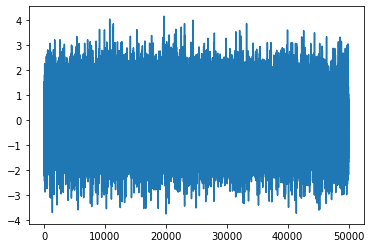

In [166]:
test = np.random.normal(0,1,50000)
import matplotlib.pyplot as plt
plt.plot(range(len(test)),test)

In [147]:
def get_cost_value(Y_hat, Y):
    m = Y_hat.shape[1]
    cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
    return np.squeeze(cost)

def get_accuracy_value(Y_hat, Y):
    Y_hat_ = convert_prob_into_class(Y_hat)
    return (Y_hat_ == Y).all(axis=0).mean()

In [ ]:
def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
    m = A_prev.shape[1]
    
    if activation is "relu":
        backward_activation_func = relu_backward
    elif activation is "sigmoid":
        backward_activation_func = sigmoid_backward
    else:
        raise Exception('Non-supported activation function')
    
    dZ_curr = backward_activation_func(dA_curr, Z_curr)
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
    dA_prev = np.dot(W_curr.T, dZ_curr)

    return dA_prev, dW_curr, db_curr

In [ ]:
def full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture):
    grads_values = {}
    m = Y.shape[1]
    Y = Y.reshape(Y_hat.shape)
   
    dA_prev = - (np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat));
    
    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        layer_idx_curr = layer_idx_prev + 1
        activ_function_curr = layer["activation"]
        
        dA_curr = dA_prev
        
        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]
        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]
        
        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_curr, W_curr, b_curr, Z_curr, A_prev, activ_function_curr)
        
        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr
    
    return grads_values

def update(params_values, grads_values, nn_architecture, learning_rate):
    for layer_idx, layer in enumerate(nn_architecture):
        params_values["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)]        
        params_values["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)]

    return params_values;

In [ ]:
def train(X, Y, nn_architecture, epochs, learning_rate):
    params_values = init_layers(nn_architecture, 2)
    cost_history = []
    accuracy_history = []
    
    for i in range(epochs):
        Y_hat, cashe = full_forward_propagation(X, params_values, nn_architecture)
        cost = get_cost_value(Y_hat, Y)
        cost_history.append(cost)
        accuracy = get_accuracy_value(Y_hat, Y)
        accuracy_history.append(accuracy)
        
        grads_values = full_backward_propagation(Y_hat, Y, cashe, params_values, nn_architecture)
        params_values = update(params_values, grads_values, nn_architecture, learning_rate)
        
    return params_values, cost_history, accuracy_history